In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [8]:
for i in arange(0.4,1,0.1):
    print(i)

0.4
0.5
0.6
0.7
0.8
0.9


In [6]:
pd.DataFrame([[1,2,3], [2,3,4]], index=[2,5])

,0,1,2
2,1,2,3
5,2,3,4


In [45]:
file_path='10_metre_surface.csv'
df = pd.read_csv(file_path, header=0, skipinitialspace=True)

In [46]:
df

,time,lat,lon,U,V
0,0,49.000004,9,5.259441,-3.808680
1,6,49.000004,9,3.885094,-4.099794
2,12,49.000004,9,3.586332,-4.292035
3,18,49.000004,9,3.146370,-2.069498
4,24,49.000004,9,3.158253,-2.541553
5,30,49.000004,9,3.091016,-0.526533
6,36,49.000004,9,4.692710,0.467602
7,42,49.000004,9,2.537054,3.812231
8,48,49.000004,9,2.143074,-0.380564
9,54,49.000004,9,1.758084,-2.064261


In [47]:
df['speed']=np.sqrt(df.U**2+df.V**2)
df['dir']=np.degrees(np.arctan2(df.V, df.U))%360
df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
df['date']=df['time'].dt.strftime('%Y%m%d')
df['HrMn']=df['time'].dt.strftime('%H%m')
df.set_index(['time'], inplace=True)

In [51]:
df['HrMn']

time
1979-01-01 00:00:00    0001
1979-01-01 06:00:00    0601
1979-01-01 12:00:00    1201
1979-01-01 18:00:00    1801
1979-01-02 00:00:00    0001
1979-01-02 06:00:00    0601
1979-01-02 12:00:00    1201
1979-01-02 18:00:00    1801
1979-01-03 00:00:00    0001
1979-01-03 06:00:00    0601
1979-01-03 12:00:00    1201
1979-01-03 18:00:00    1801
1979-01-04 00:00:00    0001
1979-01-04 06:00:00    0601
1979-01-04 12:00:00    1201
1979-01-04 18:00:00    1801
1979-01-05 00:00:00    0001
1979-01-05 06:00:00    0601
1979-01-05 12:00:00    1201
1979-01-05 18:00:00    1801
1979-01-06 00:00:00    0001
1979-01-06 06:00:00    0601
1979-01-06 12:00:00    1201
1979-01-06 18:00:00    1801
1979-01-07 00:00:00    0001
1979-01-07 06:00:00    0601
1979-01-07 12:00:00    1201
1979-01-07 18:00:00    1801
1979-01-08 00:00:00    0001
1979-01-08 06:00:00    0601
                       ... 
2017-01-24 12:00:00    1201
2017-01-24 18:00:00    1801
2017-01-25 00:00:00    0001
2017-01-25 06:00:00    0601
2017-01-25 12:0

In [48]:
df['2010':'2014']

,lat,lon,U,V,speed,dir,date,HrMn
time,,,,,,,,
2010-01-01 00:00:00,49.000004,9,1.561162,1.667712,2.284401,46.890020,20100101,0001
2010-01-01 06:00:00,49.000004,9,1.184088,0.323958,1.227605,15.301284,20100101,0601
2010-01-01 12:00:00,49.000004,9,0.426554,-2.236505,2.276819,280.797957,20100101,1201
2010-01-01 18:00:00,49.000004,9,2.149226,-2.508585,3.303358,310.588264,20100101,1801
2010-01-02 00:00:00,49.000004,9,4.565861,-1.634767,4.849695,340.300536,20100102,0001
2010-01-02 06:00:00,49.000004,9,4.028004,-1.651730,4.353507,337.703350,20100102,0601
2010-01-02 12:00:00,49.000004,9,4.586672,-2.108181,5.047969,335.314977,20100102,1201
2010-01-02 18:00:00,49.000004,9,2.392981,1.614456,2.886664,34.006085,20100102,1801
2010-01-03 00:00:00,49.000004,9,3.257946,1.726940,3.687348,27.926731,20100103,0001


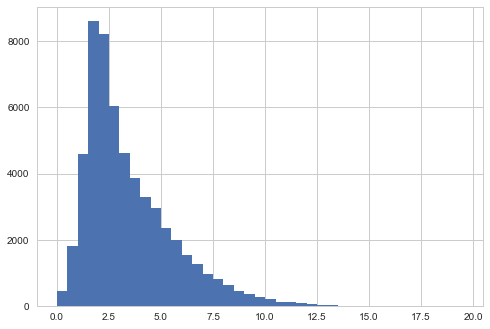

In [52]:
bins = arange(0, 20,0.5)
df['speed'].hist(bins=bins)

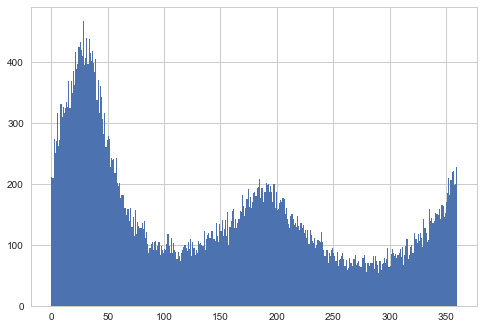

In [50]:
bins = arange(0, 361)
df['dir'].hist(bins=bins)

In [20]:
df.describe()

,time,lat,lon,U,V,speed,dir
count,55644.000000,5.564400e+04,55644.0,55644.000000,55644.000000,55644.000000,55644.000000
mean,166929.000000,4.900000e+01,9.0,1.134024,0.610280,3.443181,143.681453
std,96379.101158,3.159812e-11,0.0,3.145917,2.163077,2.092479,111.037795
min,0.000000,4.900000e+01,9.0,-11.432183,-9.439298,0.033510,0.016794
25%,83464.500000,4.900000e+01,9.0,-1.272726,-0.861800,1.917229,38.899090
50%,166929.000000,4.900000e+01,9.0,1.001839,0.650188,2.826105,130.651954
75%,250393.500000,4.900000e+01,9.0,3.194437,1.915754,4.538943,223.981302
max,333858.000000,4.900000e+01,9.0,18.459015,10.437421,18.862267,359.996467


0       1979-01-01 00:00:00
1       1979-01-01 06:00:00
2       1979-01-01 12:00:00
3       1979-01-01 18:00:00
4       1979-01-02 00:00:00
5       1979-01-02 06:00:00
6       1979-01-02 12:00:00
7       1979-01-02 18:00:00
8       1979-01-03 00:00:00
9       1979-01-03 06:00:00
10      1979-01-03 12:00:00
11      1979-01-03 18:00:00
12      1979-01-04 00:00:00
13      1979-01-04 06:00:00
14      1979-01-04 12:00:00
15      1979-01-04 18:00:00
16      1979-01-05 00:00:00
17      1979-01-05 06:00:00
18      1979-01-05 12:00:00
19      1979-01-05 18:00:00
20      1979-01-06 00:00:00
21      1979-01-06 06:00:00
22      1979-01-06 12:00:00
23      1979-01-06 18:00:00
24      1979-01-07 00:00:00
25      1979-01-07 06:00:00
26      1979-01-07 12:00:00
27      1979-01-07 18:00:00
28      1979-01-08 00:00:00
29      1979-01-08 06:00:00
                ...        
55614   2017-01-24 12:00:00
55615   2017-01-24 18:00:00
55616   2017-01-25 00:00:00
55617   2017-01-25 06:00:00
55618   2017-01-25 1

0           0 days 00:00:00
1           0 days 06:00:00
2           0 days 12:00:00
3           0 days 18:00:00
4           1 days 00:00:00
5           1 days 06:00:00
6           1 days 12:00:00
7           1 days 18:00:00
8           2 days 00:00:00
9           2 days 06:00:00
10          2 days 12:00:00
11          2 days 18:00:00
12          3 days 00:00:00
13          3 days 06:00:00
14          3 days 12:00:00
15          3 days 18:00:00
16          4 days 00:00:00
17          4 days 06:00:00
18          4 days 12:00:00
19          4 days 18:00:00
20          5 days 00:00:00
21          5 days 06:00:00
22          5 days 12:00:00
23          5 days 18:00:00
24          6 days 00:00:00
25          6 days 06:00:00
26          6 days 12:00:00
27          6 days 18:00:00
28          7 days 00:00:00
29          7 days 06:00:00
                ...        
55614   13903 days 12:00:00
55615   13903 days 18:00:00
55616   13904 days 00:00:00
55617   13904 days 06:00:00
55618   13904 days 1

In [ ]:
sss

In [1]:
#!/usr/bin/env python
from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "165.128/166.128/167.128",
    'dataset'   : "interim",
    'step'      : "0",
    'grid'      : "0.75/0.75",
    'time'      : "00/06/12/18",
    'date'      : "2014-07-01/to/2014-07-31",
    'type'      : "an",
    'class'     : "ei",
    'target'    : "interim_2014-07-01to2014-07-31_00061218.grib"
})

2017-04-28 14:20:44 ECMWF API python library 1.4.2
2017-04-28 14:20:44 ECMWF API at https://api.ecmwf.int/v1
Error contacting the WebAPI, retrying in 60 seconds ...
Error contacting the WebAPI, retrying in 60 seconds ...
Error contacting the WebAPI, retrying in 60 seconds ...
Error contacting the WebAPI, retrying in 60 seconds ...


KeyboardInterrupt: 

In [ ]:
from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "165.128/166.128/167.128",
    'dataset'   : "interim",
    'step'      : "0",
    'grid'      : "0.75/0.75",
    'time'      : "00/06/12/18",
    'date'      : "2014-07-05/to/2014-07-31",
    'type'      : "an",
    'class'     : "ei",
    'target'    : "interim_2014-07-05to2014-07-31_00061218.grib"
})

In [2]:
from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "165.128/166.128/167.128",
    'dataset'   : "interim",
    'step'      : "0",
    'grid'      : "0.75/0.75",
    'time'      : "00/06/12/18",
    'date'      : "2014-07-05/to/2014-07-31",
    'type'      : "an",
    'class'     : "ei",
    'target'    : "interim_2014-07-05to2014-07-31_00061218.grib"
})

2017-04-28 12:18:43 ECMWF API python library 1.4.2
2017-04-28 12:18:43 ECMWF API at https://api.ecmwf.int/v1
2017-04-28 12:18:45 Welcome Zhao Zike
2017-04-28 12:18:45 In case of problems, please check https://software.ecmwf.int/wiki/display/WEBAPI/Troubleshooting or contact calldesk@ecmwf.int
2017-04-28 12:18:45 
2017-04-28 12:18:47 Request submitted
2017-04-28 12:18:47 Request id: 5902c2d112b43818ff9a91e6
2017-04-28 12:18:47 Request is queued
Error contacting the WebAPI, retrying in 60 seconds ...
Calling '['nice', 'mars', '/tmp/tmp-_marsjIqJSE.req']'
mars - WARN -
mars - WARN - From 9 February 2016 10AM (UTC) MARS uses versions of
mars - WARN - libemos newer than 4.3.0. For more details, see
mars - WARN - https://software.ecmwf.int/wiki/display/EMOS/Bug+fix+implemented+in+EMOSLIB+4.3.x
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20170428.041930 - Welcome to MARS with ecCodes and ODB
mars - INFO   - 20170428.041930 - MARS Client build stamp: 20170306182930
mars - INFO

In [ ]:
from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "165.128/166.128",
    'dataset'   : "interim",
    'step'      : "0",
    'grid'      : "1/1",
    'time'      : "00/06/12/18",
    'date'      : "2014-07-01/to/2014-07-31",
    'type'      : "an",
    'class'     : "ei",
    "area"      : "8/-67/8/",
    'target'    : "interim_2014-07-01to2014-07-31_00061218.grib"
})

2017-04-28 09:53:48 ECMWF API python library 1.4.2
2017-04-28 09:53:48 ECMWF API at https://api.ecmwf.int/v1
Error contacting the WebAPI, retrying in 60 seconds ...


In [7]:
%precision 3
def test():
    print(2.15346547)
test()

2.15346547


In [4]:
2.15346547

2.153

2.15346547


In [ ]:
ssss

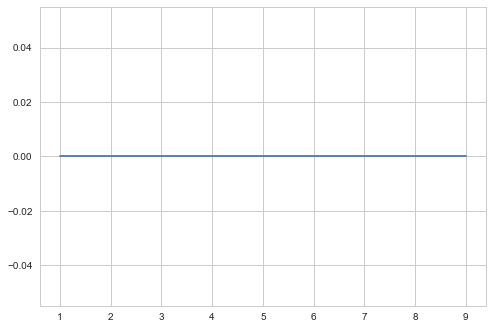

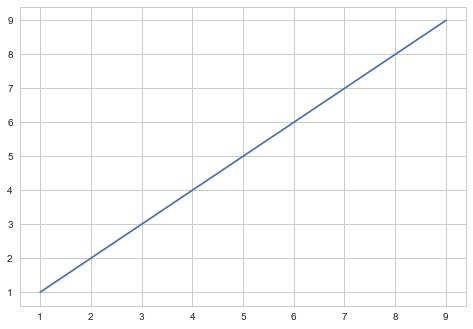

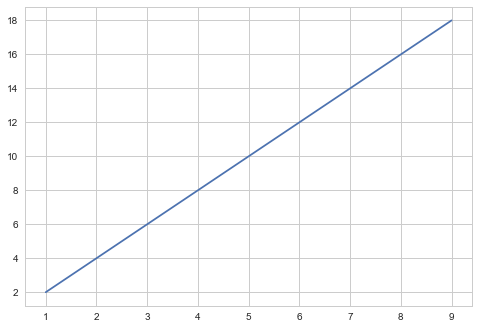

In [ ]:
figs = [try_plot(y) for y in arange(3)]

In [ ]:
from joblib import Parallel, delayed
figs = Parallel(n_jobs=-1)(delayed(try_plot)(y) for y in arange(3))

Exception in thread Thread-8:
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "D:\ProgramData\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "D:\ProgramData\Anaconda3\lib\multiprocessing\pool.py", line 429, in _handle_results
    task = get()
  File "D:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
  File "D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py", line 1445, in __setstate__
    mgr = plt._backend_mod.new_figure_manager_given_figure(num, self)
AttributeError: module 'ipykernel.pylab.backend_inline' has no attribute 'new_figure_manager_given_figure'



In [ ]:
s

In [ ]:
figs = Parallel(n_jobs=2)(delayed(try_plot)(y) for y in arange(4))

In [ ]:
sss

In [ ]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor

with open('test.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    
ep = ExecutePreprocessor(timeout=600, kernel_name='python3')

ep.preprocess(nb, {'metadata': {'path': './'}})

with open('executed_notebook.ipynb', 'wt') as f:
    nbformat.write(nb, f)

In [ ]:
a, b = np.radians([2, 5])

In [ ]:
a

In [ ]:
person1 = {'type': 1, 'name': 'Jhon', 'surname': 'Smith', 'phone': '555-1234'}
person2 = {'type': 2, 'name': 'Jannette', 'surname': 'Jhonson', 'phone': 1000000.00}

In [ ]:
pd.DataFrame([person1, person2])


In [ ]:
ssss

In [ ]:

file_dir = "./data/NCDC/europe/spain/gran_canaria/"
for file in os.listdir(file_dir):
    if file.endswith("stn.txt"):
        stn_file_path = file_dir+file
        print(file_path)

In [ ]:
with open(stn_file_path) as fp:
    for i, line in enumerate(fp):
        if i == 2:
            lat, long= line.split()[-3:-1]
            
lat, long = float(lat), float(long)
print(lat, long)

In [ ]:
import folium
map_osm = folium.Map(location=[lat, long], zoom_start=4)
folium.Marker([lat, long]).add_to(map_osm)
map_osm

In [ ]:
ssss

In [ ]:
file_path = 'D:/NDAWN/table.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

In [ ]:
df

In [ ]:
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

In [ ]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
df.to_csv('D:/NDAWN/baker_hr_avg.csv', index=False, float_format='%.2f')

In [ ]:
sss

In [ ]:
gmm = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.802,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311],]
speed_unit_text = ' (knot)'

In [ ]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [ ]:
x = [1,2,3,4]
y = [2,3,4,5]
plot(x, y )
plt_configure(xlabel="ln($V$)", ylabel="ln $P$")

In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])



In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True
df.plot.scatter(x='a', y='b')

In [ ]:
sss

In [ ]:
# mpl.style.use('ggplot')

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

In [ ]:
sss

In [ ]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
ax.set(xlabel='X Label', ylabel='Y Label', title='My Title')

In [ ]:
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
plt_configure(title = 'This is my title', figsize=(4,4), xlabel='X name', ylabel='Y name', legend=True)

In [ ]:
# fig, ax = plt.subplots()
x = [1,2,3,4,5]
y = [5,2,6,7,2]
plot(x, y, '-', label='test')
ax = plt.gca()
ax.set_title('This is my title')
ax.set_xlabel('X name')
ax.set_ylabel('Y name')
ax.legend()
plt.gcf().set_size_inches(4,4)

In [ ]:
mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']
# prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
x = [1,2,3,4,5]
y = [2,5,1,2,1]
y_menas = [3,3,3,3,3]
plot(x, y, '-', color=next(prop_cycle))
plot(x, y_menas, '--', color=next(prop_cycle))

In [ ]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

In [ ]:
len(np.linspace(0,30))

a, b, c = test = 25, 1,3

In [ ]:
test

In [ ]:
a

In [ ]:
df = pd.read_csv('test.txt', skipinitialspace=True, sep=' ', error_bad_lines=False,
                names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])
df

In [ ]:
df['dir'].apply(lambda x: str(x).isdigit())

In [ ]:
import pandas as pd
s = pd.Series(['0.55', '2', -3, '1234t1s1'])
pd.to_numeric(s, downcast='integer',errors='coerce' )

In [ ]:
s

In [ ]:
df = pd.read_csv('DSM/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

In [ ]:
df

In [ ]:
df['year'] = df['date'].apply(lambda x: str(x)[:6])
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
display(df[df.duplicated('date')])

In [ ]:
gmm_em_result = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.80,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311]]

In [ ]:
plot_gmm_ellipses(gmm_em_result)

In [ ]:
x=[1,2,3,4,5]
y=[4,5,5,2,1]
plot(x,y,'-')
plt.gca().set_xlim([1, 5])

In [ ]:
file_path = './data/NCDC/uk/tiree/dat.txt'
df = pd.read_csv(file_path,header=0, skipinitialspace=True)
df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
df = df[['date','HrMn','type','dir','speed','wind_type' ]]

In [ ]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 20000000) & (date < 20160000) ")

In [ ]:
# df = pd.read_csv('DSM/DSM.csv',header=0, skipinitialspace=True, dtype={'HrMn': object})
# df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
# df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
# df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
# df = df.dropna()
# df=df[['date','HrMn','dir','speed','dir_max','speed_max']]

In [ ]:
# df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
# df.dir = np.radians(df.dir)
# temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
# df.dir = np.degrees(df.dir)
# temp_df.dir = np.degrees(temp_df.dir)
# temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

In [ ]:
df

In [ ]:
def fit_weibul(df_speed):
    max_speed = df_speed.max()
    x = linspace(0, max_speed)
    data_size = len(df_speed)
    
    df_speed.hist(bins=arange(0, max_speed), alpha=0.5, label='Data', normed=True)  

    weibull_params = sp.stats.exponweib.fit(df_speed, floc=0, f0=1)
    y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
    plot(x, y_weibull, '--', color='black',label='Weibull') 

In [ ]:
temp_df = df

In [ ]:
for time_limit in [0, 20050000, 20100000]:
    plt.figure()
    df_speed=temp_df.query('date > @time_limit')['speed']
    fit_weibul(df_speed)
align_figures()

In [ ]:
sss

In [ ]:
temp_df

In [ ]:
temp_df2, speed_redistribution_info = randomize_speed(temp_df, 'up')

In [ ]:
fit_weibul(temp_df2)

In [ ]:
sss

In [ ]:
df_2016 = df.query('date >= 20150000 & date <= 20160000')

In [ ]:
# fit_weibul(df_2016)

In [ ]:
sss

In [ ]:
fig,ax = plt.subplots()

ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))

In [ ]:
ssss

In [ ]:
ssss

In [ ]:
sns.palplot(sns.color_palette("hls",10 ))

In [ ]:
sns.palplot(sns.color_palette("hls",6 ))

In [ ]:
sns.palplot(sns.color_palette("hls",4 ))

In [ ]:
sns.palplot(sns.color_palette("hls",3 ))

In [ ]:
sns.palplot(mpl.rcParams['axes.color_cycle'])

In [ ]:
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.palplot(sns.cubehelix_palette(reverse=True))

In [ ]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True, edgecolor = "black")

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle